### Implementing gridworld example in the book:
<img src="./gridworld.png" alt="" width="60%"/>  

<div>At each cell, four actions are possible: north, south, east and west, which deterministically cause the agent to move one cell in respective direction on the grid. Actions that would take the agent off the grid leave its location unchanged, but also result in a reward of -1. Other actions result in a reward of 0, except those that move the agent out of the special states A and B. From state A, all four actions yield a reward of +10 and take the agent to A'. From state B, all actoins yield a reward of +5 and take the agent to B'.</div>

In [1]:
from bokeh.io import output_notebook
from bokeh.charts import Line, show
import numpy as np

output_notebook()

/Users/Molly/anaconda3/lib/python3.6/site-packages/bokeh/util/deprecation.py:34: BokehDeprecationWarning: 
The bokeh.charts API has moved to a separate 'bkcharts' package.

This compatibility shim will remain until Bokeh 1.0 is released.
After that, if you want to use this API you will have to install
the bkcharts package explicitly.

  warn(message)


Loading BokehJS ...

In [2]:
GAMMA = 0.9

In [3]:
def transition(s, a):
    """given state s and action a, return new state s' and reward r"""
    if s == (0,1): # A to A'
        return ((4,1), 10)
    elif s == (0,3):  # B to B'
        return ((2,3), 5)
    if a == "N":
        s_new = (s[0]-1, s[1])
    elif a == "S":
        s_new = (s[0]+1, s[1])
    elif a == "W":
        s_new = (s[0], s[1]-1)        
    elif a == "E":
        s_new = (s[0], s[1]+1)      
    else:
        raise Exception
    if (s_new[0] < 0 or s_new[0] > 4 or s_new[1] < 0 or s_new[1] > 4):
        return (s, -1)
    else:
        return (s_new, 0)
    
    
def update_value(s, grid):
    new_value = 0
    for a in ["N", "S", "E", "W"]:
        s_new, reward = transition(s, a)
        new_value += 0.25 * (reward + GAMMA * grid[s_new])
    return new_value


def value_iteration(iters, init):
    values = [init]
    for i in range(iters):
        new_grid = values[-1].copy()
        for row in range(5):
            for col in range(5):
                new_grid[row][col] = update_value((row, col), values[-1])
        values.append(new_grid)
    return values


def plot_value_change(data, values):
    p = Line(data, plot_width=400, plot_height=300, legend="bottom_right", 
         ylabel='grid value', xlabel="iterations")
    show(p)

In [4]:
# print grid values after 100 iterations and plot grid value change
initial = np.zeros((5,5))
values = value_iteration(100, initial)

for i in [0,1,2,5,10,50]:
    print("after {0} iteration, the grid values are:".format(i))
    print(values[i],"\n")
        
data = {"A": [i[(0,1)] for i in values], 
        "B": [i[(0,3)] for i in values],
        "(0,2)": [i[(0,2)] for i in values]}
plot_value_change(data, values)

after 0 iteration, the grid values are:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]] 

after 1 iteration, the grid values are:
[[-0.5  10.   -0.25  5.   -0.5 ]
 [-0.25  0.    0.    0.   -0.25]
 [-0.25  0.    0.    0.   -0.25]
 [-0.25  0.    0.    0.   -0.25]
 [-0.5  -0.25 -0.25 -0.25 -0.5 ]] 

after 2 iteration, the grid values are:
[[ 1.46875  9.775    3.06875  5.       0.34375]
 [-0.475    2.19375 -0.05625  1.06875 -0.475  ]
 [-0.41875 -0.05625  0.      -0.05625 -0.41875]
 [-0.475   -0.1125  -0.05625 -0.1125  -0.475  ]
 [-0.8375  -0.475   -0.41875 -0.475   -0.8375 ]] 

after 5 iteration, the grid values are:
[[ 3.00614424  9.25555586  4.29815439  5.02683125  1.04080088]
 [ 1.03519121  2.67124658  1.94743213  1.49093877  0.14450762]
 [-0.30351484  0.54769834  0.3544541   0.22395146 -0.55638672]
 [-0.86304063 -0.36677988 -0.19417939 -0.42117012 -0.91429844]
 [-1.45270449 -0.94184951 -0.83766396 -0.95466396 -1.45270449]] 

after 10 iteration

### Finding the optimal solution in gridworld by solving bellman equation
<img src="./gridworld2.png" alt="" width="60%" align="left"/>  
<img src="./optimal_v.JPG" alt="" width="60%" align="left"/>  






In [5]:
""" define new value update function:
    instead of having equal chance to pick a action (N, W S or E), greedily 
    pick the action that would lead to highest reward
    if there are multiple best rewards, break tie by chosing first optimal value """

def optimal_value_update(s, grid):
    best_action = ""
    best_value = -100
    for a in ["N", "S", "E", "W"]:
        s_new, reward = transition(s, a)
        new_value = (reward + GAMMA * grid[s_new])
        if new_value > best_value:
            best_value = new_value
            best_action = a
    return best_action, best_value


def optimal_value_iteration(iters, init):
    values = [init]
    best_policy = np.chararray((5, 5))
    best_policy[:] = ''
    for i in range(iters):
        new_grid = values[-1].copy()
        for row in range(5):
            for col in range(5):
                best_action, best_value = optimal_value_update((row, col), values[-1])
                new_grid[(row, col)] = best_value
                best_policy[(row, col)] = best_action
        values.append(new_grid)
    return values, best_policy

In [6]:
# print optimal grid values after 100 iterations and plot grid value change
initial = np.zeros((5,5))
values, best_policy = optimal_value_iteration(100, initial)

for i in [0,1,2,5,10,50]:
    print("after {0} iteration, the grid values are:".format(i))
    print(values[i],"\n")
print("best policy learned")
print(best_policy)
        
data = {"A": [i[(0,1)] for i in values], 
        "B": [i[(0,3)] for i in values],
        "(0,2)": [i[(0,2)] for i in values],
        "(4,0)": [i[(4,0)] for i in values]}
p = Line(data, plot_width=400, plot_height=300, legend="bottom_right", 
         ylabel='grid value', xlabel="iterations")
show(p)

after 0 iteration, the grid values are:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]] 

after 1 iteration, the grid values are:
[[ 0. 10.  0.  5.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]] 

after 2 iteration, the grid values are:
[[ 9.  10.   9.   5.   4.5]
 [ 0.   9.   0.   4.5  0. ]
 [ 0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0. ]] 

after 5 iteration, the grid values are:
[[ 9.     10.      9.      8.645   7.7805]
 [ 8.1     9.      8.1     7.7805  6.561 ]
 [ 7.29    8.1     7.29    6.561   3.645 ]
 [ 6.561   7.29    6.561   3.645   3.2805]
 [ 0.      6.561   0.      3.2805  0.    ]] 

after 10 iteration, the grid values are:
[[14.31441    15.9049     14.31441    13.23930744 11.65470489]
 [12.882969   14.31441    12.882969   11.65470489 10.43520489]
 [11.5946721  12.882969   11.5946721  10.43520489  8.23930744]
 [10.43520489 11.5946721  10.43520489 

### Q learning with gridworld #2 from AIMA book
<img src="./gridworld3.png" alt="" width="40%"/>  

  
    

In [7]:
import numpy as np
from pprint import pprint as pp

from matplotlib import pyplot as plt
%matplotlib inline

In [30]:
def transition(s, a, deterministic=False, action_penalty=0.1):
    """given state s and action a, 
    return new state s' and reward r, 
    choice of the world being deterministic/non-deterministic
    """
    if deterministic:
        p=[1,0,0]
    else:
        p=[0.8,0.1,0.1]

    if s == (1,1): 
        if a == "up":
            choices = [((2,1), 0), ((1,1), 0), ((1,2), 0)]
        elif a == "down":
            choices = [((1,1), 0), ((1,1), 0), ((1,2), 0)]
        elif a == "right":
            choices = [((1,2), 0), ((2,1), 0), ((1,1), 0)]
        elif a == "left":
            choices = [((1,1), 0), ((1,1), 0), ((1,2), 0)]
    elif s == (2, 1):
        if a == "up":
            choices = [((3,1), 0), ((2,1), 0), ((2,1), 0)]
        elif a == "down":
            choices = [((1,1), 0), ((2,1), 0), ((2,1), 0)]
        elif a == "right":
            choices = [((2,1), 0), ((3,1), 0), ((1,1), 0)]
        elif a == "left":
            choices = [((2,1), 0), ((3,1), 0), ((1,1), 0)]
    elif s == (3, 1):
        if a == "up":
            choices = [((3,1), 0), ((3,1), 0), ((3,2), 0)]
        elif a == "down":
            choices = [((2,1), 0), ((3,1), 0), ((3,2), 0)]
        elif a == "right":
            choices = [((3,2), 0), ((3,1), 0), ((2,1), 0)]
        elif a == "left":
            choices = [((3,1), 0), ((3,1), 0), ((2,1), 0)]
    elif s == (1, 2):
        if a == "up":
            choices = [((1,2), 0), ((1,1), 0), ((1,3), 0)]
        elif a == "down":
            choices = [((1,2), 0), ((1,1), 0), ((1,3), 0)]
        elif a == "right":
            choices = [((1,3), 0), ((1,2), 0), ((1,2), 0)]
        elif a == "left":
            choices = [((1,1), 0), ((1,2), 0), ((1,2), 0)]
    elif s == (3, 2):
        if a == "up":
            choices = [((3,2), 0), ((3,3), 0), ((3,1), 0)]
        elif a == "down":
            choices = [((3,2), 0), ((3,3), 0), ((3,1), 0)]
        elif a == "right":
            choices = [((3,3), 0), ((3,2), 0), ((3,2), 0)]
        elif a == "left":
            choices = [((3,1), 0), ((3,2), 0), ((3,2), 0)]
    elif s == (1, 3):
        if a == "up":
            choices = [((2,3), 0), ((1,2), 0), ((1,4), 0)]
        elif a == "down":
            choices = [((1,3), 0), ((1,2), 0), ((1,4), 0)]
        elif a == "right":
            choices = [((1,4), 0), ((2,3), 0), ((1,3), 0)]
        elif a == "left":
            choices = [((1,2), 0), ((1,3), 0), ((2,3), 0)]
    elif s == (2, 3):
        if a == "up":
            choices = [((3,3), 0), ((2,3), 0), ("T", -1)]
        elif a == "down":
            choices = [((1,3), 0), ((2,3), 0), ("T", -1)]
        elif a == "right":
            choices = [("T", -1), ((3,3), 0), ((1,3), 0)]
        elif a == "left":
            choices = [((2,3), 0), ((3,3), 0), ((1,3), 0)]
    elif s == (3, 3):
        if a == "up":
            choices = [((3,3), 0), ((3,2), 0), ("T", 1)]
        elif a == "down":
            choices = [((2,3), 0), ((3,2), 0), ("T", 1)]
        elif a == "right":
            choices = [("T", 1), ((3,3), 0), ((2,3), 0)]
        elif a == "left":
            choices = [((3,2), 0), ((3,3), 0), ((2,3), 0)]
    elif s == (1, 4):
        if a == "up":
            choices = [("T", -1), ((1,4), 0), ((1,3), 0)]
        elif a == "down":
            choices = [((1,4), 0), ((1,4), 0), ((1,3), 0)]
        elif a == "right":
            choices = [((1,4), 0), ((1,4), 0), ("T", -1)]
        elif a == "left":
            choices = [((1,3), 0), ((1,4), 0), ("T", -1)]
    choices = [(s, r-action_penalty) for (s,r) in choices]
    return choices[np.random.choice(range(3), p=p)]


def pick_action(Q, s, epsilon=0.01):
    actions = ["up", "down", "right", "left"]
    explore = np.random.choice([1, 0], p=(epsilon, 1-epsilon))
    if explore:
        return np.random.choice(actions)
    else:
        Q_values = [Q[(s, a)] for a in actions]
        return actions[np.argmax(Q_values)]


def plot_state_Qs(state):
    plt.figure(dpi=200)
    for a in actions:
        plt.plot(range(len(history[state][a])), history[state][a], label=str(state)+a)
    plt.legend()
    

def print_state_Qs(state):
    for a in actions:
        print(a, Q[(state,a)])

In [61]:
# initialization
states = [(1,1), (1,2), (1,3), (1,4),
          (2,1), (2,3), 
          (3,1), (3,2), (3,3), "T"]
actions = ["up", "down", "right", "left"]
alpha = 0.1
gamma = 0.9
action_penalty = 0.0
epsilon = 0.1
iterations = 2001
history = {s: {a:[0] for a in actions} for s in states}

# initializae
Q = {}
for s in states:
    for a in actions:
        Q.update({(s, a): 0})

states_visited = {s:0 for s in states}

for i in range(iterations):
    s = np.random.choice(states)
    while True:
        states_visited[s] += 1
        if s == "T":
            break
        else:
            a = pick_action(Q, s, epsilon=epsilon)
            s_prime, r = transition(s, a, deterministic=False,
                                    action_penalty=action_penalty)
            next_best_action = pick_action(Q, s_prime, epsilon=0)
            current_Q = Q[(s,a)]
            Q[(s,a)] = ((1-alpha)* current_Q + 
                alpha*(r + gamma*Q[(s_prime, next_best_action)]))
            history[s][a].append(Q[(s,a)])
            s = s_prime

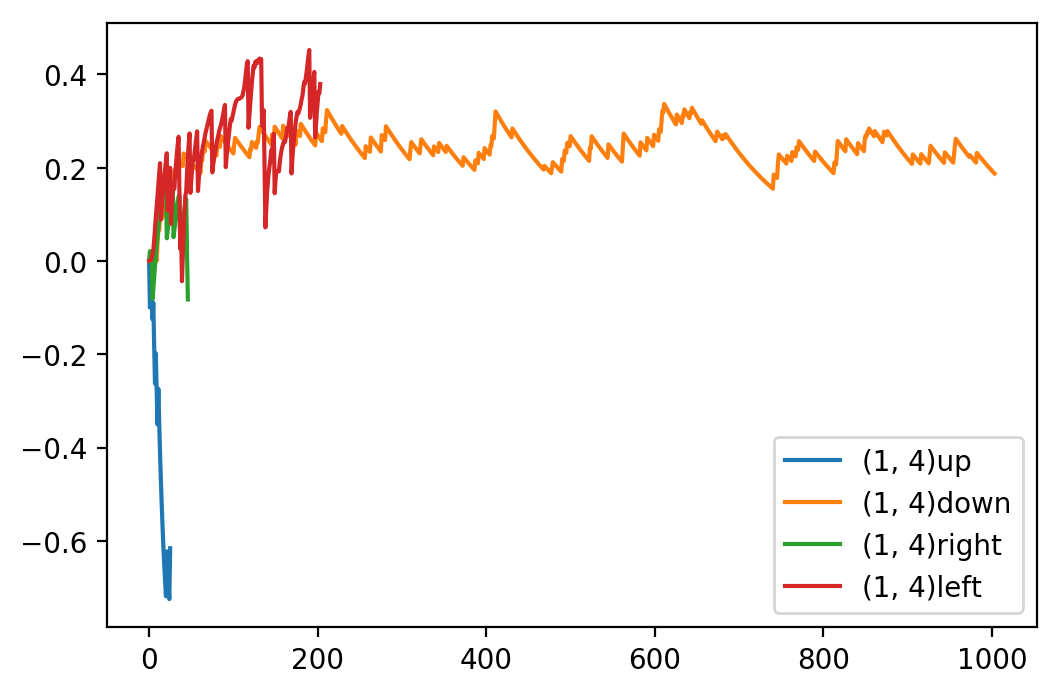

In [62]:
plot_state_Qs((1,4))

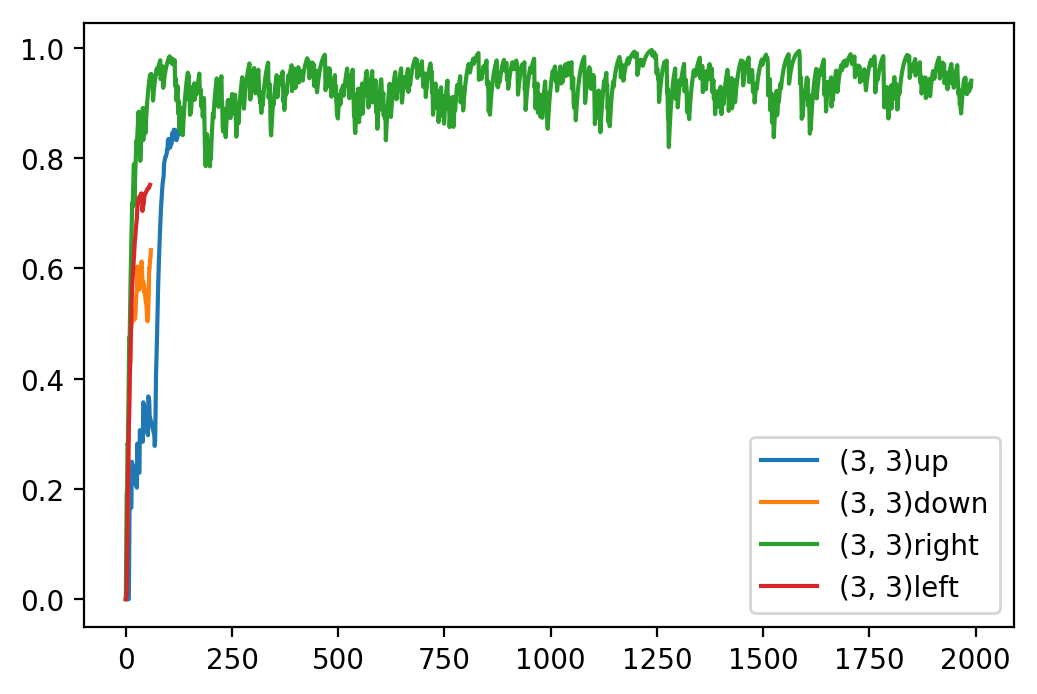

In [63]:
plot_state_Qs((3,3))